# Importing the Dataset:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


total 891 rows and 152 column

# Checking Null values in the dataframe.

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

so null value present on file

In [4]:
import seaborn as sns

<AxesSubplot:>

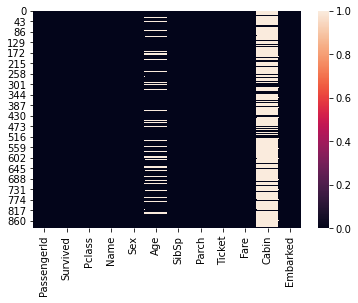

In [5]:
sns.heatmap(df.isnull())

In [6]:
df['Age']=df['Age'].replace(np.NAN,df['Age'].mean())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [16]:
lencode=LabelEncoder()
df['Name']=lencode.fit_transform(df['Name'])
df['Sex']=lencode.fit_transform(df['Sex'])
df['Ticket']=lencode.fit_transform(df['Ticket'])
df['Cabin']=lencode.fit_transform(df['Cabin'])
df['Embarked']=lencode.fit_transform(df['Embarked'])

In [17]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int32
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

In [18]:
df['Cabin']=df['Cabin'].replace(np.NAN,df['Cabin'].mean())
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

so bye this two fuction we remove null value and also change the data type

# Description data

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,130.744108,1.538721
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,36.024237,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


bye the description we seen there is skewness present on data

# corelation of data

In [20]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.235406,-0.022239
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226


# HeatMap

<AxesSubplot:>

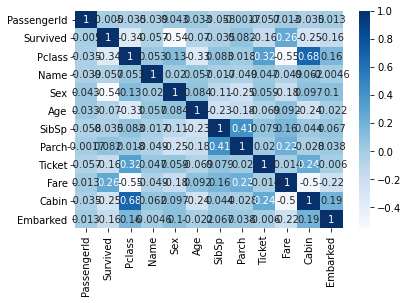

In [22]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

# Eda Processing

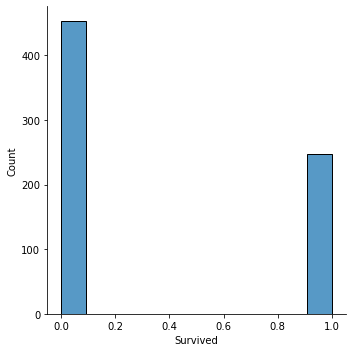

In [92]:
sns.displot(df['Survived'])

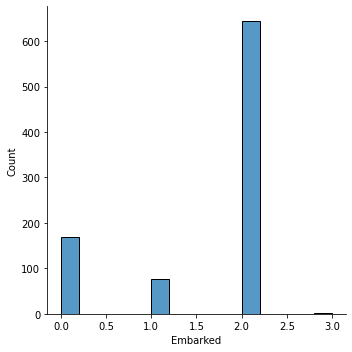

In [23]:
sns.displot(df['Embarked'])

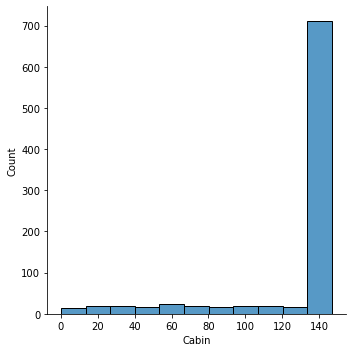

In [24]:
sns.displot(df['Cabin'])

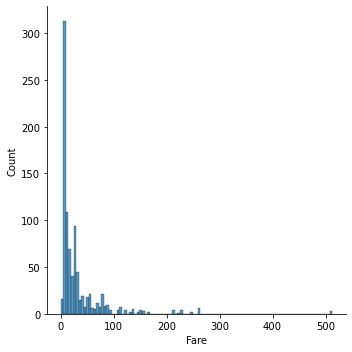

In [25]:
sns.displot(df['Fare'])

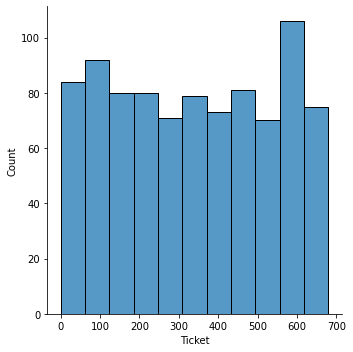

In [26]:
sns.displot(df['Ticket'])

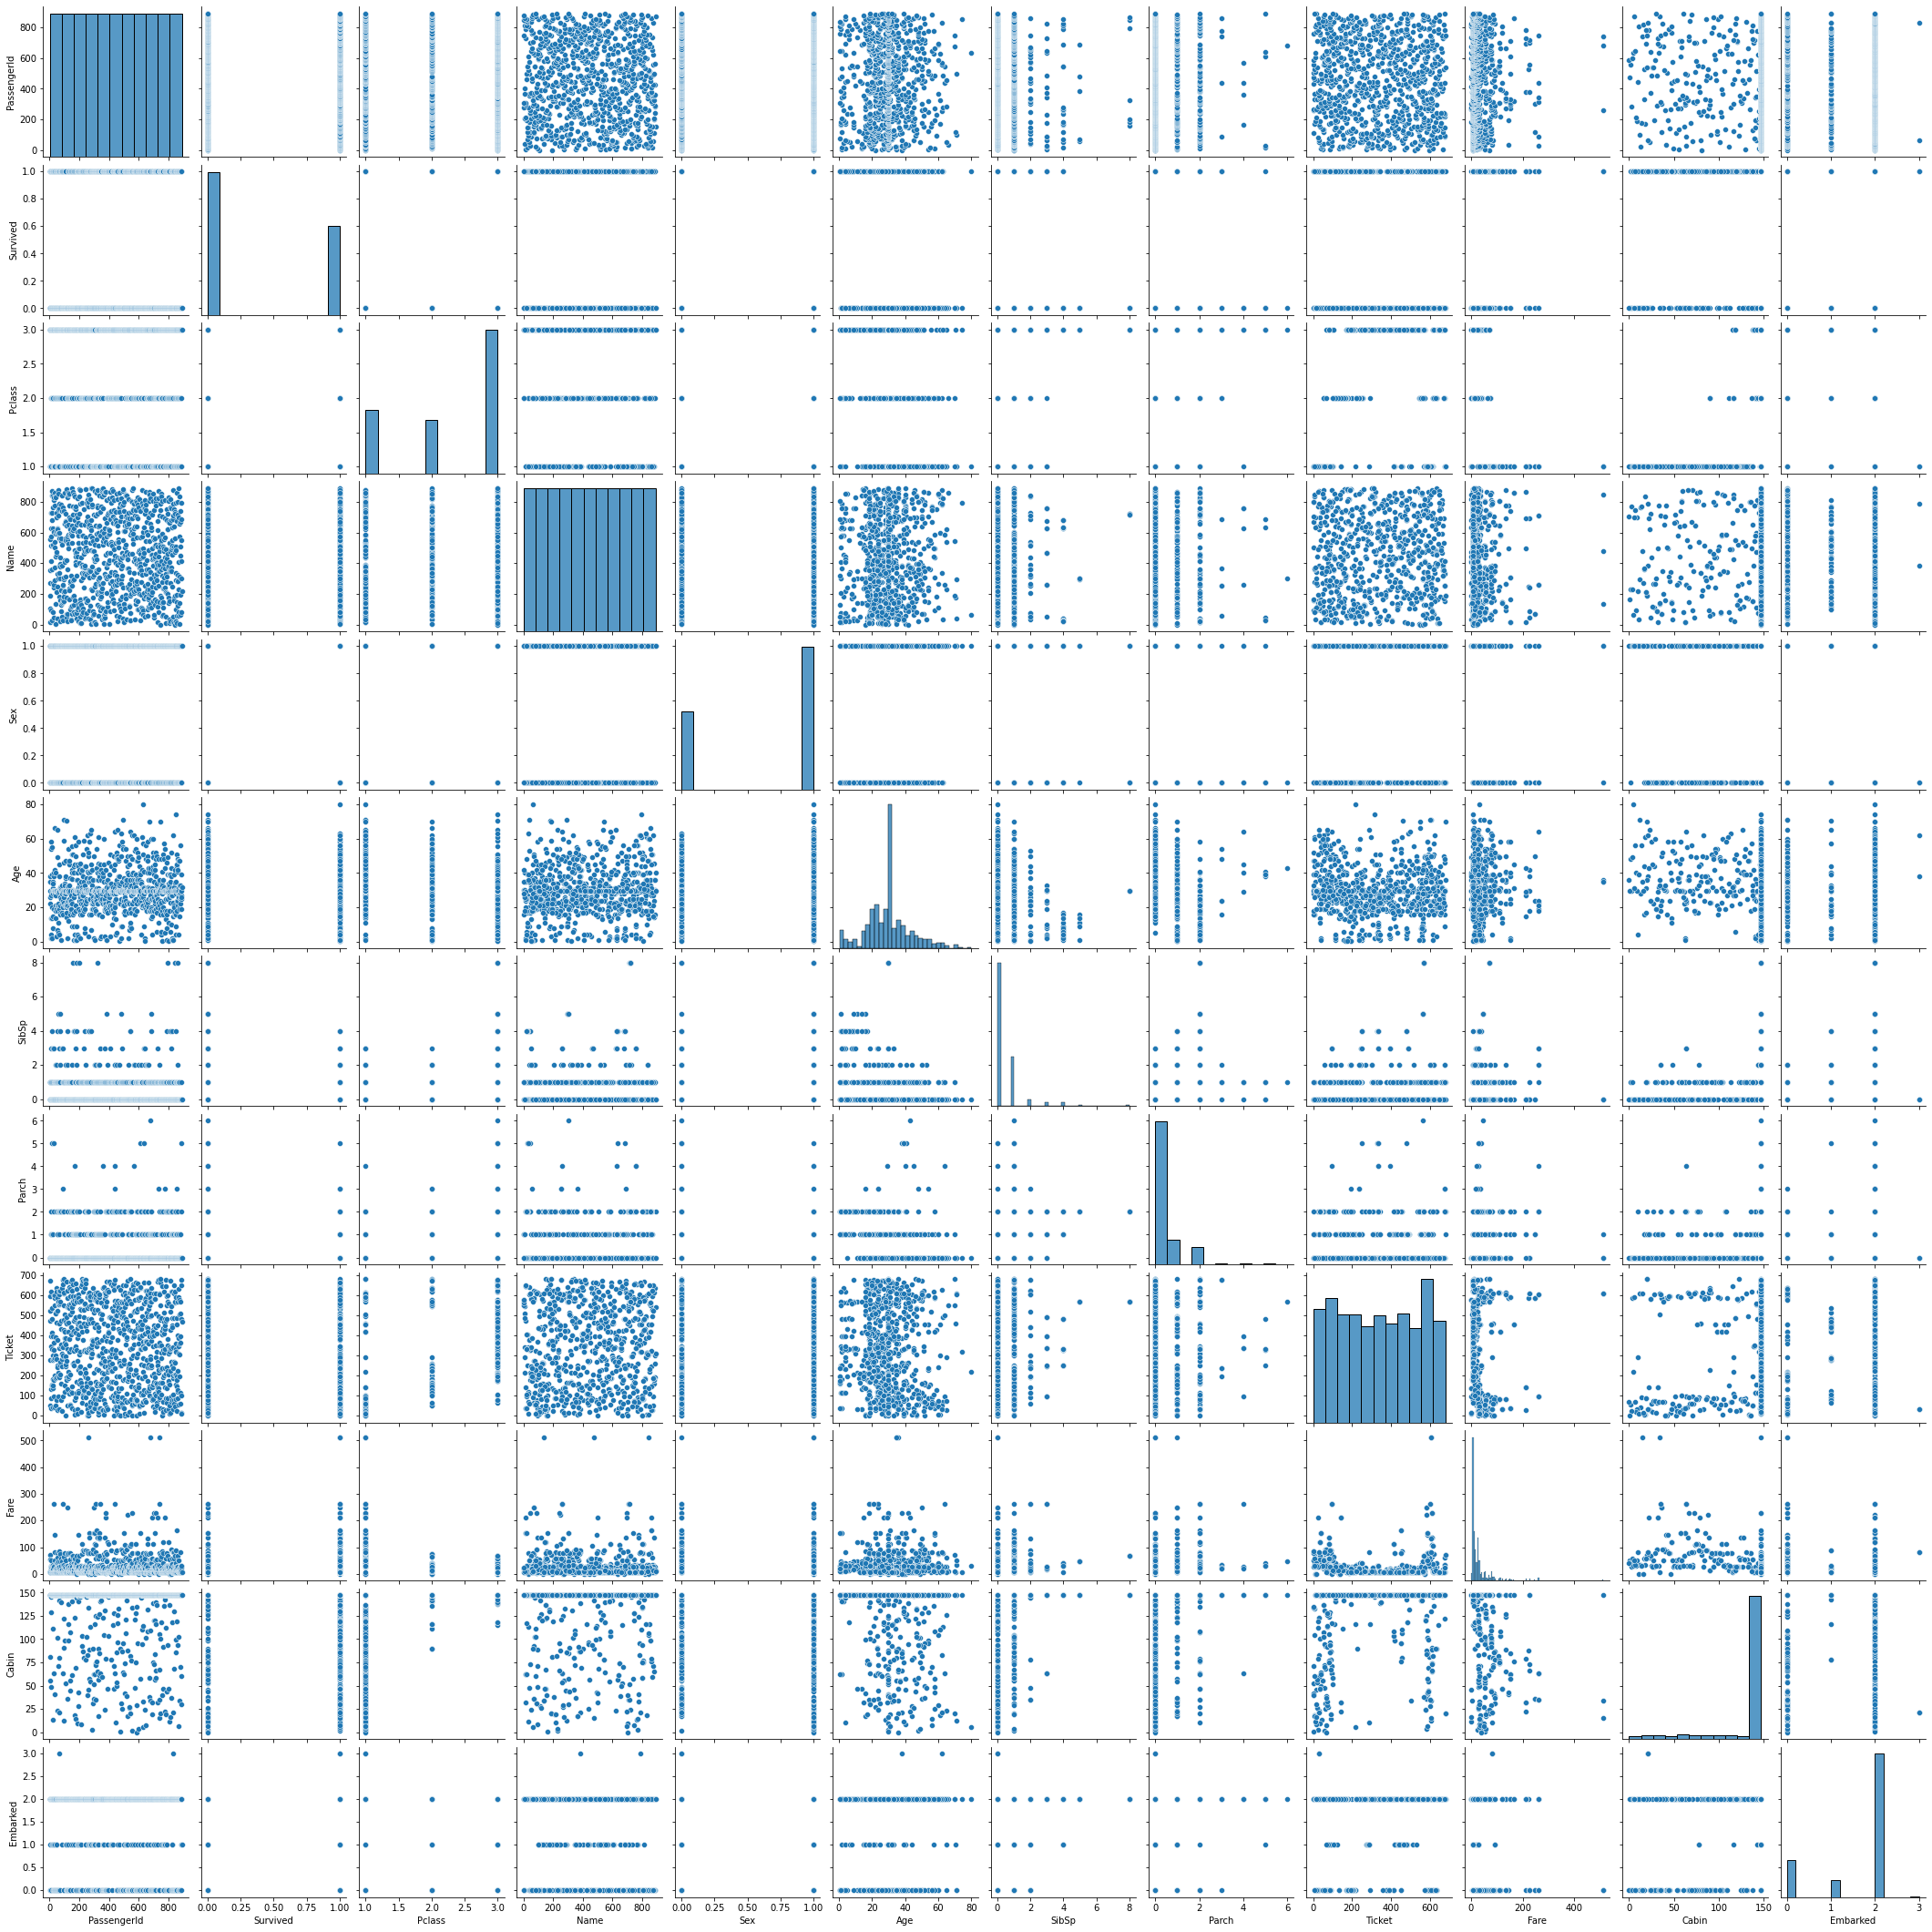

In [27]:
sns.pairplot(df)

# skew ness treatment

In [28]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin         -2.167313
Embarked      -1.246689
dtype: float64

In [32]:
df.shape

(891, 12)

In [29]:
from scipy.stats import zscore

In [44]:
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  7,   8,  11,  21,  26,  26,  28,  38,  48,  52,  55,  55,  68,
         75,  81, 120, 123, 124, 131, 132, 137, 147, 154, 160, 169, 170,
        170, 202, 209, 219, 226, 227, 229, 233, 237, 238, 258, 264, 264,
        271, 271, 283, 283, 284, 289, 295, 297, 300, 330, 334, 335, 340,
        348, 348, 348, 352, 367, 375, 377, 393, 393, 393, 394, 405, 427,
        437, 438, 440, 450, 450, 456, 458, 472, 483, 485, 486, 489, 489,
        497, 515, 528, 530, 536, 550, 551, 556, 572, 574, 574, 580, 581,
        581, 597, 598, 609, 619, 638, 655, 678, 683, 687, 687, 687, 704,
        708, 709, 721, 721, 721, 735, 735, 736, 742, 767, 780, 794, 795],
       dtype=int64),
 array([ 6,  7, 10,  6,  9, 10,  5,  7, 10,  7,  6,  7,  7,  6,  7,  7, 10,
         7,  7,  7,  7,  7,  6,  7, 10,  9, 10,  6,  7,  7,  7,  7, 10, 10,
         9,  9, 10,  7,  9,  7,  9,  7,  9,  9,  9,  9,  9,  9, 10,  9,  6,
         7,  7,  9, 10,  7,  6,  7,  7,  7,  9, 10,  7,  7,  7, 10,  6, 10,
         7,  9, 1

In [45]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,61,1,28.0,0,0,565,10.5000,147,2
884,885,0,3,793,1,25.0,0,0,650,7.0500,147,2
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [46]:
df_new_z.shape

(700, 12)

In [47]:
df=df_new_z
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.022267,-0.006269,-0.049385,0.066540,-0.007647,-0.069812,0.060000,-0.072906,-0.029274,0.004785,0.015586
Survived,-0.022267,1.000000,-0.276224,-0.028264,-0.560384,-0.101726,0.161374,0.211151,-0.140897,0.290129,-0.221725,-0.144191
Pclass,-0.006269,-0.276224,1.000000,0.012501,0.118391,-0.339801,-0.146961,-0.078625,0.339110,-0.713072,0.624195,0.073402
Name,-0.049385,-0.028264,0.012501,1.000000,0.000727,0.075036,-0.084325,-0.073997,0.036569,-0.027497,-0.046366,-0.000876
Sex,0.066540,-0.560384,0.118391,0.000727,1.000000,0.083229,-0.191999,-0.188041,0.068949,-0.191449,0.088332,0.142452
Age,-0.007647,-0.101726,-0.339801,0.075036,0.083229,1.000000,-0.095450,-0.202258,-0.088487,0.205335,-0.232321,0.045973
SibSp,-0.069812,0.161374,-0.146961,-0.084325,-0.191999,-0.095450,1.000000,0.336697,-0.065691,0.382176,-0.123024,-0.098159
Parch,0.060000,0.211151,-0.078625,-0.073997,-0.188041,-0.202258,0.336697,1.000000,-0.076631,0.168507,-0.029786,-0.046723
Ticket,-0.072906,-0.140897,0.339110,0.036569,0.068949,-0.088487,-0.065691,-0.076631,1.000000,-0.189499,0.223766,0.033289
Fare,-0.029274,0.290129,-0.713072,-0.027497,-0.191449,0.205335,0.382176,0.168507,-0.189499,1.000000,-0.594487,-0.222493


In [48]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,447.925714,0.352857,2.424286,451.041429,0.700000,29.889836,0.295714,0.124286,338.015714,20.143552,139.552857,1.565714
std,255.628514,0.478200,0.766788,251.727990,0.458585,11.252235,0.518316,0.330143,191.944059,21.327035,20.381450,0.762100
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,1.000000,0.000000,50.000000,0.000000
25%,226.750000,0.000000,2.000000,233.750000,0.000000,23.000000,0.000000,0.000000,169.750000,7.879200,147.000000,1.000000
50%,448.500000,0.000000,3.000000,451.500000,1.000000,29.699118,0.000000,0.000000,337.000000,10.500000,147.000000,2.000000
75%,667.250000,1.000000,3.000000,656.250000,1.000000,34.000000,1.000000,0.000000,500.250000,25.946900,147.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,65.000000,2.000000,1.000000,679.000000,113.275000,147.000000,2.000000


<AxesSubplot:>

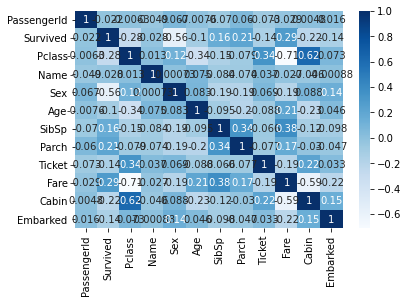

In [49]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

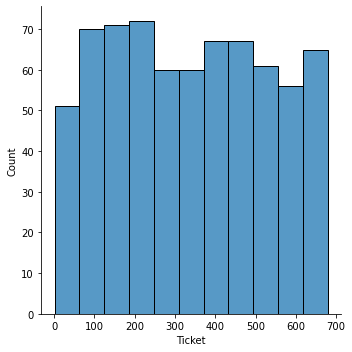

In [50]:
sns.displot(df['Ticket'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fb82f0e520>,
 'caps': [<matplotlib.lines.Line2D at 0x1fb82f0ebe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fb82f0e220>],
 'medians': [<matplotlib.lines.Line2D at 0x1fb82f1a2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fb82f1a640>],
 'means': []}

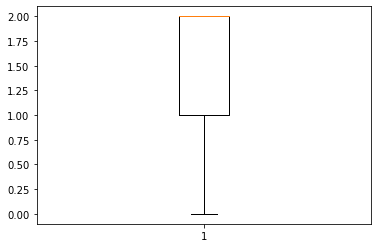

In [51]:
import matplotlib
import matplotlib.pyplot as plt
plt.boxplot(df.Embarked)

box plot for target column

{'whiskers': [<matplotlib.lines.Line2D at 0x1fb82f67af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fb82f741f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fb82f67790>],
 'medians': [<matplotlib.lines.Line2D at 0x1fb82f748b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fb82f74c10>],
 'means': []}

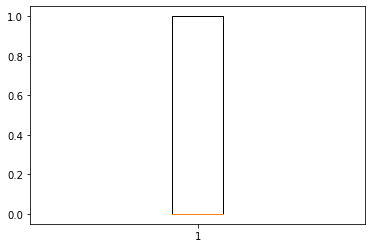

In [52]:
plt.boxplot(df.Survived)

SkewNess is Removed

# Separating the columns into features and target:

In [55]:
features=df.drop("Survived",axis=1)
target=df["Survived"]

# Processing Classification Technique

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [65]:
x=features
y=target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.20,random_state= 42)

In [66]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.6214285714285714
[[54 27]
 [26 33]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.67        81
           1       0.55      0.56      0.55        59

    accuracy                           0.62       140
   macro avg       0.61      0.61      0.61       140
weighted avg       0.62      0.62      0.62       140



In [67]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5785714285714286
[[81  0]
 [59  0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        81
           1       0.00      0.00      0.00        59

    accuracy                           0.58       140
   macro avg       0.29      0.50      0.37       140
weighted avg       0.33      0.58      0.42       140



In [68]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6785714285714286
[[62 19]
 [26 33]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73        81
           1       0.63      0.56      0.59        59

    accuracy                           0.68       140
   macro avg       0.67      0.66      0.66       140
weighted avg       0.68      0.68      0.68       140



In [69]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.65
[[66 15]
 [34 25]]
              precision    recall  f1-score   support

           0       0.66      0.81      0.73        81
           1       0.62      0.42      0.51        59

    accuracy                           0.65       140
   macro avg       0.64      0.62      0.62       140
weighted avg       0.65      0.65      0.63       140



In [71]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5857142857142857
[[81  0]
 [58  1]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.74        81
           1       1.00      0.02      0.03        59

    accuracy                           0.59       140
   macro avg       0.79      0.51      0.38       140
weighted avg       0.76      0.59      0.44       140



In [73]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))
svmkernel('rbf')

0.5785714285714286
[[81  0]
 [59  0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        81
           1       0.00      0.00      0.00        59

    accuracy                           0.58       140
   macro avg       0.29      0.50      0.37       140
weighted avg       0.33      0.58      0.42       140



In [74]:
svmkernel('poly')

0.5857142857142857
[[81  0]
 [58  1]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.74        81
           1       1.00      0.02      0.03        59

    accuracy                           0.59       140
   macro avg       0.79      0.51      0.38       140
weighted avg       0.76      0.59      0.44       140



In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7571428571428571
[[72  9]
 [25 34]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        81
           1       0.79      0.58      0.67        59

    accuracy                           0.76       140
   macro avg       0.77      0.73      0.74       140
weighted avg       0.76      0.76      0.75       140



In [76]:
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7571428571428571
[[72  9]
 [25 34]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        81
           1       0.79      0.58      0.67        59

    accuracy                           0.76       140
   macro avg       0.77      0.73      0.74       140
weighted avg       0.76      0.76      0.75       140



In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

0.7785714285714286
[[73  8]
 [23 36]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        81
           1       0.82      0.61      0.70        59

    accuracy                           0.78       140
   macro avg       0.79      0.76      0.76       140
weighted avg       0.78      0.78      0.77       140



In [78]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB(),GradientBoostingClassifier()]

In [79]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of DecisionTreeClassifier() is:
0.7285714285714285
[[63 18]
 [20 39]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        81
           1       0.68      0.66      0.67        59

    accuracy                           0.73       140
   macro avg       0.72      0.72      0.72       140
weighted avg       0.73      0.73      0.73       140



Accuracy score of SVC() is:
0.5785714285714286
[[81  0]
 [59  0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        81
           1       0.00      0.00      0.00        59

    accuracy                           0.58       140
   macro avg       0.29      0.50      0.37       140
weighted avg       0.33      0.58      0.42       140



Accuracy score of KNeighborsClassifier() is:
0.65
[[66 15]
 [34 25]]
              precision    recall  f1-score   support

           0       0.66      0.81      0.73        81
           1 

so highest accuracy giving GBC

# Saving The Model

In [80]:
import joblib
joblib.dump(gb,'gbfile.obj')
gb_from_joblib=joblib.load('gbfile.obj')
gb_from_joblib.predict(x_test)

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [81]:
import pickle
filename = 'picklegbfile.pkl'
pickle.dump(gb, open(filename, 'wb'))
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Result

In [82]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(mnb,x,y,cv=15)
print(score)
print(score.mean())
print(score.std())

[0.61702128 0.59574468 0.72340426 0.55319149 0.63829787 0.55319149
 0.72340426 0.70212766 0.57446809 0.55319149 0.76086957 0.5
 0.56521739 0.56521739 0.58695652]
0.6141535615171139
0.07543243605497682


In [83]:
from sklearn.model_selection import KFold
kfold=KFold(15)
print(score)
print(score.mean())
print(score.std())

[0.61702128 0.59574468 0.72340426 0.55319149 0.63829787 0.55319149
 0.72340426 0.70212766 0.57446809 0.55319149 0.76086957 0.5
 0.56521739 0.56521739 0.58695652]
0.6141535615171139
0.07543243605497682


In [84]:
score=cross_val_score(knn,x,y,cv=15)
print(score)
print(score.mean())
print(score.std())

[0.65957447 0.55319149 0.57446809 0.72340426 0.59574468 0.57446809
 0.65957447 0.57446809 0.70212766 0.63829787 0.7173913  0.63043478
 0.54347826 0.65217391 0.60869565]
0.6271662041319764
0.056579032767665356


In [86]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.67857143 0.72142857 0.8        0.8        0.84285714]
0.7685714285714286
0.059693092616503365


In [85]:
score=cross_val_score(gb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.81428571 0.81428571 0.84285714 0.82142857 0.8       ]
0.8185714285714285
0.013997084244475292


Result is model will give best result with GBC technique

# conclustion

In [87]:
loaded_model = pickle.load(open('picklegbfile.pkl', 'rb'))
result = loaded_model.score(features_test, target_test)
print(result)

0.8928571428571429


Model is giving 89% accuracy

so as per the result 89% passanger can be survived